# 1.Exploratory Data Analysis

In [2]:
# Let's import all nessesary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Upload our train and test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [115]:
train.shape # Look at dimensionality of train data set


(51083, 17)

In [4]:
test.shape # Look at dimensionality of test data set

(17201, 16)

In [7]:
train.head(10) # Look at first 10 rows of train dataset

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1
5,5,57190176,650924,2017-09-08 14:41:22.000,1,1,0.0,6.31771,5.45949,0,16,2,7,0.0,13.676642,0,0,0
6,6,12257432,1308432,2017-09-08 15:32:02.000,1,1,0.0,4.03670,3.78279,0,10,3,3,0.0,10.968003,0,0,0
7,7,55498260,2020484,2017-09-08 15:39:12.000,2,1,0.0,5.10330,4.65572,0,19,2,11,0.0,13.865668,0,5,1
8,8,18333420,1994096,2017-09-08 15:49:28.000,2,1,0.0,11.07510,9.93743,0,28,9,11,0.0,19.251349,0,0,0
9,9,54548632,1812244,2017-09-08 16:29:12.000,2,1,0.0,1.84686,1.68092,0,5,3,1,0.0,10.968003,0,0,0


## Quiz 1.
## Let's check if customers like speedy drivers or not.

In [7]:
# Let's calculate average speed for each driver by each order in km per hour.
# To estimate personal speed of each driver, we exclude distance and duration time spending in traffic
# To cancelled orders, orders with empty distance or duration time  we assign speed as 0.

train['avg_speed'] = np.where((train['is_cancelled'] == 1) | (train['distance_travelled'] == 0) | (train['duration_time'] == 0), 0,
                              train['distance_travelled_while_moving']/(train['duration_time']-train['wait_time_in_journey'])*60).astype(int)    

In [8]:
# Keep only drive records with assigned ratings and correct average speed
train_check1 = train[(train['avg_speed']>=0) &(train['was_rated'] == 1)]

In [9]:
train_check1.shape

(34863, 19)

In [104]:
train_check1['avg_speed'].describe() # Overall statistics about speed in our dataset

count    34863.000000
mean        33.701919
std         11.434707
min          0.000000
25%         28.000000
50%         33.000000
75%         38.000000
max        666.000000
Name: avg_speed, dtype: float64

rating
1    33.103546
2    34.289100
3    34.020870
4    33.709008
5    33.704979
Name: avg_speed, dtype: float64


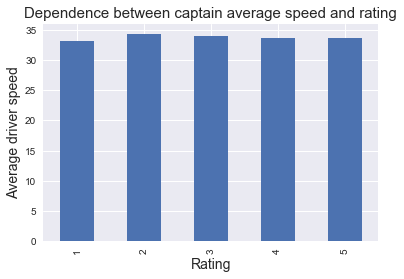

In [100]:
speed_rating = train_check1.groupby(train_check1['rating'])['avg_speed'].mean()
print(speed_rating)
speed_rating.plot(kind='bar')
plt.xlabel("Rating", fontsize = 14)
plt.ylabel("Average driver speed", fontsize = 14)
plt.title("Dependence between captain average speed and rating", fontsize = 15)

In [103]:
print("In average, trip is %.2f km." % train['distance_travelled'].mean()) # in average 8 km
print("Trip time takes nearly %.f minutes." %train['duration_time'].mean()) # in average 16 minutes
print("And %d%% of trip time car spends in traffic." % (train['wait_time_in_journey'].mean()/train['duration_time'].mean()*100)) # third of trip time car spends in traffic

In average, trip is 6.81 km.
Trip time takes nearly 16 minutes.
And 37% of trip time car spends in traffic.


### As we can see, there is no dependence between captain's average speed and rating.
### There are few reasons for that:
### 1. Average trip represents a short distance and takes only 16 minutes.
### 2. The third of duration time car spends in traffic so there is no chance to captain keep a normal drive speed.


### Quiz 2.
### Estimate dependence between required estimated price and long distances.

In [95]:
train['was_est_price'] = np.where(train['estimated_price'] == 0,0,1) # Create new column with flag of estimated price request
train.head(10) #  First 10 rows

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated,avg_speed,was_est_price
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1,47,0
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1,21,0
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1,61,0
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0,23,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1,42,0
5,5,57190176,650924,2017-09-08 14:41:22.000,1,1,0.0,6.31771,5.45949,0,16,2,7,0.0,13.676642,0,0,0,36,0
6,6,12257432,1308432,2017-09-08 15:32:02.000,1,1,0.0,4.03670,3.78279,0,10,3,3,0.0,10.968003,0,0,0,32,0
7,7,55498260,2020484,2017-09-08 15:39:12.000,2,1,0.0,5.10330,4.65572,0,19,2,11,0.0,13.865668,0,5,1,34,0
8,8,18333420,1994096,2017-09-08 15:49:28.000,2,1,0.0,11.07510,9.93743,0,28,9,11,0.0,19.251349,0,0,0,35,0
9,9,54548632,1812244,2017-09-08 16:29:12.000,2,1,0.0,1.84686,1.68092,0,5,3,1,0.0,10.968003,0,0,0,25,0


Dependence between travel distance and estimated price request:
                avg_travel_distance
was_est_price                     
0                         6.645891
1                         8.039014


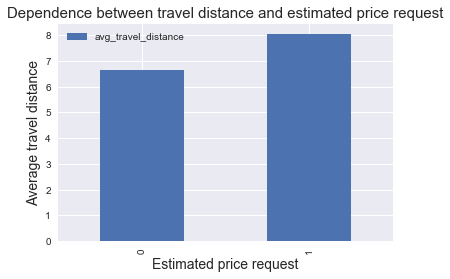

In [94]:
estimated_price = train.groupby(train['was_est_price'])['distance_travelled'].agg(['mean']).rename(columns={'mean':'avg_travel_distance'})
print("Dependence between travel distance and estimated price request:\n",estimated_price)
estimated_price.plot(kind='bar')
plt.xlabel("Estimated price request", fontsize = 14)
plt.ylabel("Average travel distance", fontsize = 14)
plt.title("Dependence between travel distance and estimated price request", fontsize = 15)

### As we see, there is a definite trend between price request and travel distance.
### Those who requested estimated price for trip, in average going farther.

## 2. Hypotheses and insights bringing

### Quiz 3.
### Let's distinguish our trips on clusters using 2 features - travelled distance and price.

In [16]:
from sklearn.cluster import KMeans # Import library responsible for KMeans cluster method

In [168]:
X = train[['distance_travelled','price']].values # Select two variables for clustering

In [170]:
# Don't use elbow method here to estimate optimal number of clusters;
# Just randomly select number of clusters 
kmeans = KMeans(n_clusters=3)

In [155]:
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [165]:
print("We get 3 clusters with following average distance and price:\n",centroids) # Look at centroids of our clusters

We get 3 clusters with following average distance and price:
 [[  3.86936722  11.13951703]
 [ 41.1142946   31.35206706]
 [ 11.18934417  18.21401582]]


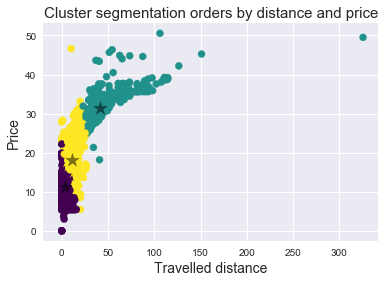

In [166]:

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap ='viridis') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='black',marker = '*', s=200, alpha=0.5); # Add centroid 'star' to each cluster
plt.xlabel("Travelled distance", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.title("Cluster segmentation orders by distance and price", fontsize = 15)

### As we see, we get 3 travel types:
### 1. Short trips with average price 11 dirhams and distance 4 km.
### 2. Medium trips with average price 18 dirhams and distance 11 km.
### 3. Long trips with average price 31 dirhams and distance 41 km.

### Quiz 4.
### Hypothesis: clients who wait taxi longer then in average, rates their trip worse.


Statistics for variable 'wait_time_initial':
 count    34877.000000
mean         2.153454
std          2.636636
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         45.000000
Name: wait_time_initial, dtype: float64

Average waiting time before pick-up takes 2.15 minutes

Dependence between rating and waiting time before pick-up: 
         avg_waiting_time
rating                  
1               3.130312
2               2.876777
3               2.428819
4               2.376863
5               2.097663


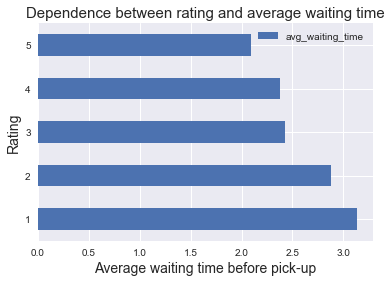

In [91]:
train_rated = train[train['was_rated']==1]
print("Statistics for variable 'wait_time_initial':\n", train_rated['wait_time_initial'].describe())
print("\nAverage waiting time before pick-up takes %.2f minutes" %train_rated['wait_time_initial'].mean())
rating_waittime = train_rated.groupby(train_rated['rating'])['wait_time_initial'].agg(['mean']).rename(columns={'mean':'avg_waiting_time'})
print("\nDependence between rating and waiting time before pick-up: \n", rating_waittime)

rating_waittime.plot(kind='barh')
plt.xlabel("Average waiting time before pick-up", fontsize = 14)
plt.ylabel("Rating", fontsize = 14)
plt.title("Dependence between rating and average waiting time", fontsize = 15)

### On the plot above we see a definite trend and it has sense: the less time customer is waiting for taxi, the higher rate he will estimate his trip.

# 3. Rating prediction

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE  # Recursive Feature Elimination
from sklearn.cross_validation import cross_val_score, train_test_split 
from sklearn.metrics import average_precision_score, recall_score,precision_score,f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


# Upload our train and test data sets again
train = pd.read_csv('train.csv').iloc[:,1:]
Y_train = pd.DataFrame(train.was_rated.values)
# del train['was_rated']
test = pd.read_csv('test.csv').iloc[:,1:]
add_cust_data = pd.read_csv('trip_rating.csv')

In [97]:
#Y_train[0].value_counts(normalize=True)
add_cust_data.head(10) # First 10 rows
# add_cust_data.shape # Shape of dataset
# pd.Series(add_cust_data['customer_id']).nunique() # 6269 unique customers

,Unnamed: 0,driver_id,customer_id,rating
0,0,1410368,24305512,5
1,8,1675128,50837872,5
2,25,1775868,58055388,3
3,28,986496,8850476,5
4,55,1892204,8850476,5
5,58,1441800,17501256,0
6,60,881956,22075560,5
7,142,1884552,21144612,5
8,147,929744,14327868,0
9,156,1335388,49638136,5


In [98]:
# New features from customer history: average|min|max historical rate, flag of 'was rated previously', amount of rates
rating_history_mean = pd.DataFrame(add_cust_data.groupby(['customer_id'])['rating'].agg(['mean']).rename(columns={'mean':'avg_rating_prev'}))
rating_history_max = add_cust_data.groupby(['customer_id'])['rating'].agg(['max']).rename(columns={'max':'max_rating_prev'})
rating_history_min = add_cust_data.groupby(['customer_id'])['rating'].agg(['min']).rename(columns={'min':'min_rating_prev'})
rating_history_count = add_cust_data.groupby(['customer_id'])['rating'].agg(['count']).rename(columns={'count':'count_rating_prev'})
rating_history_was = add_cust_data.groupby(['customer_id'])['rating'].agg(['sum']).rename(columns={'sum':'was_rated_prev'})
rating_history_was['was_rated_prev'] = np.where(rating_history_was['was_rated_prev']>0,1,0)
# rating_history_was
# rating_history_mean
# rating_history_mean.dtypes
# rating_history_count.head(10)
# rating_history_min.shape

In [116]:
# Let's concatenate train and test data sets to make mutual features
ntrain = train.shape[0]
print (ntrain)
ntest = test.shape[0]
print(ntest)
train_test = pd.concat((train, test), axis=0).reset_index(drop=True)
print(train_test.shape)

51083
17201
(68284, 17)


In [104]:
# Merge to train_test dataset features from customer history additional dataset
train_test = train_test.merge(rating_history_mean,how='left',left_on='customer_id',right_index=True)
train_test = train_test.merge(rating_history_max,how='left',left_on='customer_id',right_index=True)
train_test = train_test.merge(rating_history_min,how='left',left_on='customer_id',right_index=True)
train_test = train_test.merge(rating_history_count,how='left',left_on='customer_id',right_index=True)
train_test = train_test.merge(rating_history_was,how='left',left_on='customer_id',right_index=True)
train_test.head(10)

,booking_source,car_type,creation_date,customer_id,distance_travelled,distance_travelled_while_moving,driver_id,duration_time,estimated_distance,estimated_duration,...,price,rating,wait_time_in_journey,wait_time_initial,was_rated,avg_rating_prev,max_rating_prev,min_rating_prev,count_rating_prev,was_rated_prev
0,1,1,2017-09-08 11:32:05.000,52400320,7.28666,7.17712,1838640,11,0.0,0,...,17.375184,4.0,2,18,1.0,2.500000,5.0,0.0,2.0,1.0
1,1,1,2017-09-08 12:42:33.000,29858456,1.25836,1.05664,1793472,4,0.0,0,...,8.507064,4.0,1,1,1.0,1.428571,5.0,0.0,7.0,1.0
2,2,1,2017-09-08 12:46:42.000,30828968,14.57820,14.44060,1726788,16,0.0,0,...,19.745205,5.0,2,3,1.0,4.464286,5.0,0.0,56.0,1.0
3,2,1,2017-09-08 13:52:35.000,47974768,1.51911,1.18684,1181696,8,0.0,0,...,10.968003,0.0,5,0,0.0,3.333333,5.0,0.0,3.0,1.0
4,2,1,2017-09-08 14:18:47.000,59503764,11.09320,10.67240,2063752,19,0.0,0,...,17.595398,5.0,4,1,1.0,NaN,NaN,NaN,NaN,NaN
5,1,1,2017-09-08 14:41:22.000,57190176,6.31771,5.45949,650924,16,0.0,0,...,13.676642,0.0,7,2,0.0,0.000000,0.0,0.0,1.0,0.0
6,1,1,2017-09-08 15:32:02.000,12257432,4.03670,3.78279,1308432,10,0.0,0,...,10.968003,0.0,3,3,0.0,3.909091,5.0,0.0,22.0,1.0
7,2,1,2017-09-08 15:39:12.000,55498260,5.10330,4.65572,2020484,19,0.0,0,...,13.865668,5.0,11,2,1.0,3.687500,5.0,0.0,16.0,1.0
8,2,1,2017-09-08 15:49:28.000,18333420,11.07510,9.93743,1994096,28,0.0,0,...,19.251349,0.0,11,9,0.0,3.555556,5.0,0.0,27.0,1.0
9,2,1,2017-09-08 16:29:12.000,54548632,1.84686,1.68092,1812244,5,0.0,0,...,10.968003,0.0,1,3,0.0,NaN,NaN,NaN,NaN,NaN


In [105]:
# Let's extract some features from variable 'creation_date'
train_test['creation_date_'] = pd.to_datetime(train_test["creation_date"])
train_test['day'] = train_test['creation_date_'].dt.day
train_test['week'] = train_test['creation_date_'].dt.week
train_test['dayofweek'] = train_test['creation_date_'].dt.dayofweek
train_test['dayofyear'] = train_test['creation_date_'].dt.dayofyear
train_test['hour'] = train_test['creation_date_'].dt.hour
# train_test.head(10)

In [106]:
# Calculate average speed and distance in traffic
train_test['avg_speed'] = np.where((train_test['is_cancelled'] == 1) | (train_test['distance_travelled'] == 0) | (train_test['duration_time'] == 0), 0,
                              train_test['distance_travelled_while_moving']/(train_test['duration_time']-train_test['wait_time_in_journey'])*60).astype(int)
train_test['distance_traffic'] = train_test['distance_travelled'] - train_test['distance_travelled_while_moving']
train_test.head(10)

,booking_source,car_type,creation_date,customer_id,distance_travelled,distance_travelled_while_moving,driver_id,duration_time,estimated_distance,estimated_duration,...,count_rating_prev,was_rated_prev,creation_date_,day,week,dayofweek,dayofyear,hour,avg_speed,distance_traffic
0,1,1,2017-09-08 11:32:05.000,52400320,7.28666,7.17712,1838640,11,0.0,0,...,2.0,1.0,2017-09-08 11:32:05,8,36,4,251,11,47,0.10954
1,1,1,2017-09-08 12:42:33.000,29858456,1.25836,1.05664,1793472,4,0.0,0,...,7.0,1.0,2017-09-08 12:42:33,8,36,4,251,12,21,0.20172
2,2,1,2017-09-08 12:46:42.000,30828968,14.57820,14.44060,1726788,16,0.0,0,...,56.0,1.0,2017-09-08 12:46:42,8,36,4,251,12,61,0.13760
3,2,1,2017-09-08 13:52:35.000,47974768,1.51911,1.18684,1181696,8,0.0,0,...,3.0,1.0,2017-09-08 13:52:35,8,36,4,251,13,23,0.33227
4,2,1,2017-09-08 14:18:47.000,59503764,11.09320,10.67240,2063752,19,0.0,0,...,NaN,NaN,2017-09-08 14:18:47,8,36,4,251,14,42,0.42080
5,1,1,2017-09-08 14:41:22.000,57190176,6.31771,5.45949,650924,16,0.0,0,...,1.0,0.0,2017-09-08 14:41:22,8,36,4,251,14,36,0.85822
6,1,1,2017-09-08 15:32:02.000,12257432,4.03670,3.78279,1308432,10,0.0,0,...,22.0,1.0,2017-09-08 15:32:02,8,36,4,251,15,32,0.25391
7,2,1,2017-09-08 15:39:12.000,55498260,5.10330,4.65572,2020484,19,0.0,0,...,16.0,1.0,2017-09-08 15:39:12,8,36,4,251,15,34,0.44758
8,2,1,2017-09-08 15:49:28.000,18333420,11.07510,9.93743,1994096,28,0.0,0,...,27.0,1.0,2017-09-08 15:49:28,8,36,4,251,15,35,1.13767
9,2,1,2017-09-08 16:29:12.000,54548632,1.84686,1.68092,1812244,5,0.0,0,...,NaN,NaN,2017-09-08 16:29:12,8,36,4,251,16,25,0.16594


In [107]:
### Parsing customers by their orders amount in form of percentile
customer_count = train_test['customer_id'].value_counts()
train_test['top_10_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 90)] else 0)
train_test['top_25_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 75)] else 0)
train_test['top_5_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 95)] else 0)
train_test['top_50_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 50)] else 0)
train_test['top_1_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 99)] else 0)
train_test['top_2_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 98)] else 0)
train_test['top_15_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 85)] else 0)
train_test['top_20_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 80)] else 0)
train_test['top_30_customer'] = train_test['customer_id'].apply(lambda x: 1 if x in customer_count.index.values[
    customer_count.values >= np.percentile(customer_count.values, 70)] else 0)
# train_test.head(10)

In [108]:
# Delete all datatime variables and target variables to avoid overfitting
del train_test['creation_date'],train_test['creation_date_'],train_test['customer_id'],train_test['rating'], train_test['was_rated']
# Finally divide on train and test data sets
X_train = train_test.iloc[:ntrain,:]
X_test = train_test.iloc[ntrain:,:]
#train_test.head(10)

In [109]:
# Impute al MISSING values on '-1' value to avoid errors in model fitting
X_train = X_train.fillna(-1)
X_test = X_test.fillna(-1)

In [133]:
# To estimate accuracy and stainability of our model let's split on 2 random subsets in ratio 60%-40%
x_train, x_test, y_train,y_test = train_test_split (X_train,Y_train,test_size = 0.4, random_state=42424) # Data Partition
X_train.head(10)

,booking_source,car_type,distance_travelled,distance_travelled_while_moving,driver_id,duration_time,estimated_distance,estimated_duration,estimated_price,is_cancelled,...,distance_traffic,top_10_customer,top_25_customer,top_5_customer,top_50_customer,top_1_customer,top_2_customer,top_15_customer,top_20_customer,top_30_customer
0,1,1,7.28666,7.17712,1838640,11,0.0,0,0.0,0,...,0.10954,1,1,1,1,1,1,1,1,1
1,1,1,1.25836,1.05664,1793472,4,0.0,0,0.0,0,...,0.20172,0,1,0,1,0,0,1,1,1
2,2,1,14.57820,14.44060,1726788,16,0.0,0,0.0,0,...,0.13760,1,1,1,1,1,1,1,1,1
3,2,1,1.51911,1.18684,1181696,8,0.0,0,0.0,0,...,0.33227,0,0,0,1,0,0,0,0,0
4,2,1,11.09320,10.67240,2063752,19,0.0,0,0.0,0,...,0.42080,0,0,0,1,0,0,0,0,0
5,1,1,6.31771,5.45949,650924,16,0.0,0,0.0,0,...,0.85822,0,0,0,1,0,0,0,0,1
6,1,1,4.03670,3.78279,1308432,10,0.0,0,0.0,0,...,0.25391,1,1,0,1,0,0,1,1,1
7,2,1,5.10330,4.65572,2020484,19,0.0,0,0.0,0,...,0.44758,1,1,1,1,0,0,1,1,1
8,2,1,11.07510,9.93743,1994096,28,0.0,0,0.0,0,...,1.13767,1,1,1,1,0,0,1,1,1
9,2,1,1.84686,1.68092,1812244,5,0.0,0,0.0,0,...,0.16594,0,0,0,1,0,0,0,0,0


In [139]:
classf = RandomForestClassifier(n_estimators = 500,max_features = 6,min_samples_leaf = 100,
                                n_jobs = -1,random_state = 1,class_weight = 'balanced') # Define our model 
func  = classf.fit(x_train, y_train)  # Fitting our model

preds = func.predict(x_test)
# print( preds.mean())
print("Accuracy of RandomForest model is %.5f" % classf.score(x_test,y_test))  # Accuracy of model
# 0.6927
# Precision 0.809
# Recall 0.725

#Confusion matrix
from sklearn.metrics import confusion_matrix 
labels = ['not rated','rated']
confusion_matrix = confusion_matrix(y_test, preds) 
print("Confusion matrix results:\n",confusion_matrix) 
# print (y_test.sum())
print ("Precision score of model is %.3f" % precision_score(y_test,preds))
print ("Recall score of model is %.3f" % recall_score(y_test,preds))
print ("F1 score of model is %.3f" % f1_score(y_test,preds))

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of RandomForest model is 0.69394
Confusion matrix results:
 [[ 4015  2368]
 [ 3886 10165]]
Precision score of model is 0.811
Recall score of model is 0.723
F1 score of model is 0.765


### As we see, we have a pretty good precision 0.81 but recall is only  0.72.
### It means that our model has pretty high False Negative Rate.

In [140]:
# Create a list of feature names
feat_labels = list(X_train.columns)
# feat_labels
importances = func.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the name and gini importance of each feature
for feature in zip([feat_labels[i] for i in indices], importances[indices]):
    print(feature)    

('avg_rating_prev', 0.11389770707259225)
('is_cancelled', 0.08688796424500575)
('distance_travelled', 0.08687717220688225)
('distance_travelled_while_moving', 0.071511693122963044)
('avg_speed', 0.057550784241176565)
('distance_traffic', 0.056804025883944731)
('top_10_customer', 0.052787029106577357)
('top_5_customer', 0.046877902621048455)
('top_20_customer', 0.04547833466838716)
('top_15_customer', 0.044124445991386319)
('top_25_customer', 0.031897878920119922)
('top_30_customer', 0.031725927740386697)
('count_rating_prev', 0.026672700792413361)
('min_rating_prev', 0.026576047786734145)
('top_2_customer', 0.025451667638246332)
('duration_time', 0.025212863640453803)
('top_50_customer', 0.016749232174535521)
('wait_time_initial', 0.015150660930229393)
('price', 0.013850161735730209)
('top_1_customer', 0.013370362098587203)
('driver_id', 0.013210606650302164)
('hour', 0.012705696642322149)
('max_rating_prev', 0.011877000230312131)
('dayofyear', 0.011748393404388177)
('day', 0.010800245

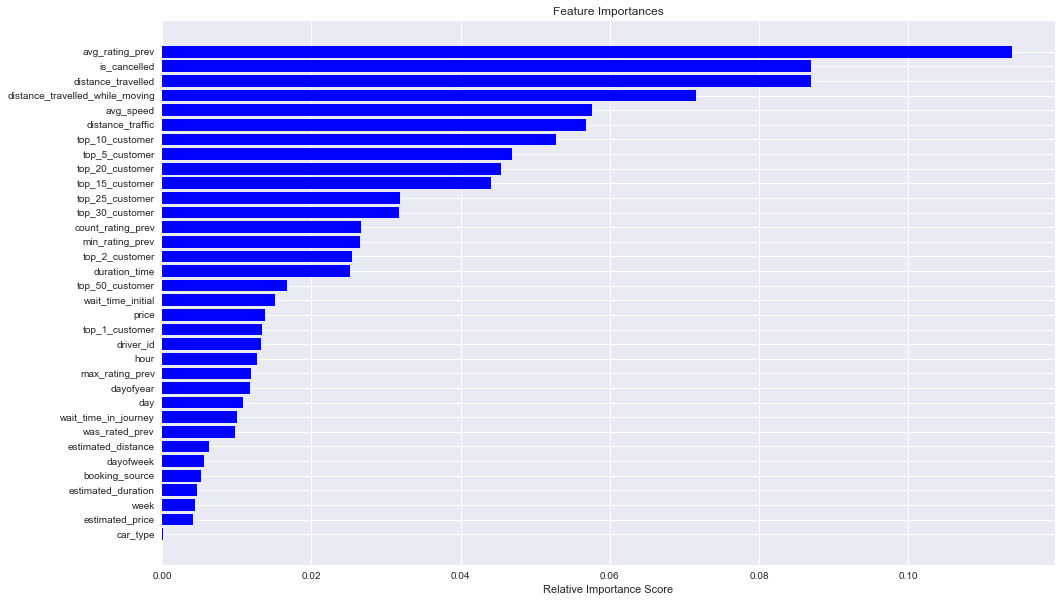

In [141]:
# Plot bar with features by importance value
importances = func.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize = (16,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat_labels[i] for i in indices])
plt.xlabel('Relative Importance Score')

### Let's reduce dimension of our features and select features with most importance value.

In [148]:


# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
sfm = SelectFromModel(func, threshold=0.05)

# Train the selector
sfm.fit(x_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

C:\Users\Pavel\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


distance_travelled
distance_travelled_while_moving
is_cancelled
avg_rating_prev
avg_speed
distance_traffic
top_10_customer


In [155]:
# Transform the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
# X_important_test.shape
x_train, x_test, y_train,y_test = train_test_split (X_train,Y_train,test_size = 0.4, random_state=42424) # Data Partition
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators = 200,min_samples_leaf = 100, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(x_train, y_train)

preds_new = clf_important.predict(x_test)

print("Accuracy of RandomForest model with 7 important features is %.5f" % clf_important.score(x_test,y_test))  # Accuracy of model
# 0.739
print ("Precision score of model is %.3f" % precision_score(y_test,preds_new))
print ("Recall score of model is %.3f" % recall_score(y_test,preds_new))
print ("F1 score of model is %.3f" % f1_score(y_test,preds_new))

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy of RandomForest model with 7 important features is 0.73960
Precision score of model is 0.739
Recall score of model is 0.962
F1 score of model is 0.835


### We can reduce number of features in our model keeping only 7 most important.
### It gives us increase in accuracy and F1 score.
### Precision score decreased from 0.81 to 0.74 but the good side is that recall increased from 0.72 to 0.96
### so we pick up almost all customers who will rate their trip

### Recommended metric is F1 Score

In [183]:
# Make predictions to Test data set
prediction_test = clf_important.predict(X_test)

In [186]:
# Save our predictions
submit_data = pd.DataFrame(prediction_test,index=None,columns=['was_rated'])
submit_data.reset_index(inplace=True)
submit_data.to_csv('submit_data.csv',index=None)